![](https://seeklogo.com/images/N/nba-75-years-logo-7E38B318A3-seeklogo.com.png)

# **Initial EDA**
## CPSC322 Final Project
### Everett Johnson
### Luke Martin
### April 18, 2022
### NBA Team Success Predictor

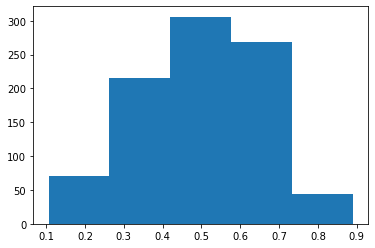

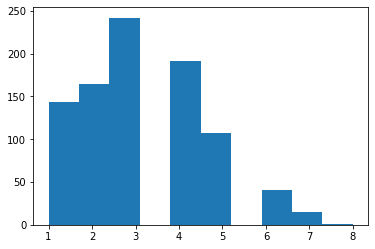

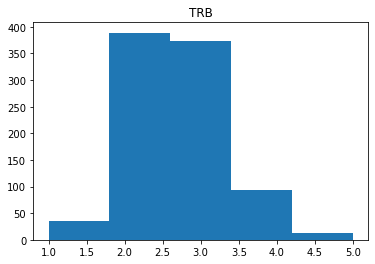

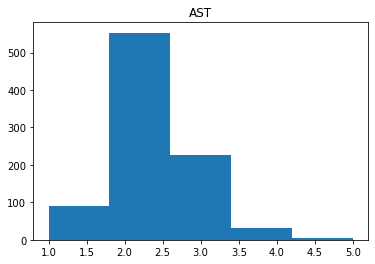

In [1]:
import matplotlib.pyplot as plt
import os
from mysklearn.mypytable import MyPyTable
import mysklearn.myevaluation as myeval
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyNaiveBayesClassifier, MyDummyClassifier

file_loc = os.path.join("input_data", "processed_data", "team_info.csv")
team_data = MyPyTable().load_from_file(file_loc)

win_percentage = team_data.get_column("Win Percentage")
plt.figure()
plt.hist(win_percentage, bins=5)
plt.show()

file_loc = os.path.join("input_data", "processed_data", "team_stats.csv")
team_stats = MyPyTable().load_from_file(file_loc)

jppg = team_stats.get_column("JPPG")
plt.figure()
plt.hist(jppg, bins=10)
plt.show()

trb = team_stats.get_column("TRB")
plt.figure()
plt.title("TRB")
plt.hist(trb, bins=5)
plt.show()

ast = team_stats.get_column("AST")
plt.figure()
plt.title("AST")
plt.hist(ast, bins=5)
plt.show()

In [2]:
y = team_stats.get_column("Success")
team_stats.drop_column("Success")
team_stats.drop_column("Team")
team_stats.drop_column("Season")
X = team_stats.data

In [6]:
from tabulate import tabulate
knn = MyKNeighborsClassifier(10)
print("KFold Acc:", myeval.kfold_accuracy(X, y, knn, n_splits=10, random_state=0))
print(tabulate(myeval.kfold_confusion_matrix(X, y, [1,2,3,4,5], knn, n_splits=10)))
dummy = MyDummyClassifier()
print("Dummy Acc:", myeval.kfold_accuracy(X, y, dummy, n_splits=10, random_state=0))

KFold Acc: 0.42935982339955847
-  -  ---  ---  --  -  -----  ---------------
   1    2    3   4  5  Total  Recognition (%)
1  2   33   21   1  0  57     4
2  5  131   90  20  0  246    53
3  2  124  164  50  0  340    48
4  1   51  110  70  0  232    30
5  0    4   12  15  0  31     0
-  -  ---  ---  --  -  -----  ---------------
Dummy Acc: 0.37527593818984545
